In [ ]:
# %matplotlib notebook

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import seaborn as sns

# import scikitplot as skplt



from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as KMeans, DBSCAN as DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve, classification_report
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedGroupKFold

# imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedGroupKFold



from sklearn.pipeline import Pipeline
sns.set()
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.8/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:

# pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# lets import our data
# /content/drive/MyDrive/data.csv
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
# find the number of nan in the original dataset
df.isna().sum().sum()
# 4,914,430

4914430

In [ ]:
df.size
# 8,925,150

8925150

In [ ]:
# so there are 4914430 / 8925150 * 100 missing values in the original dataframe
print((df.isna().sum().sum()) / (df.size) * 100)

# great! 55 percent of the values in the dataframe are NaN

55.06271603278377


In [ ]:
# print(df['iso_code'].unique())
print(len(df['date'].unique()))

305


In [ ]:
dl = df['date'].unique().tolist()
dl = sorted(dl)
dl[0], dl[-1]


('2019-12-31', '2020-10-30')

In [ ]:
pd.set_option('display.max_rows', 220)

In [ ]:

df2 = df.groupby(['iso_code'])['iso_code'].count()
df2

iso_code
ABW    304
AFG    305
AGO    304
AIA    304
ALB    304
AND    304
ARE    305
ARG    304
ARM    305
ATG    283
AUS    305
AUT    305
AZE    305
BDI    304
BEL    305
BEN    304
BES    212
BFA    304
BGD    304
BGR    304
BHR    305
BHS    283
BIH    304
BLR    305
BLZ    304
BMU    304
BOL    304
BRA    305
BRB    304
BRN    304
BTN    304
BWA    304
CAF    304
CAN    305
CHE    305
CHL    304
CHN    305
CIV    304
CMR    304
COD    304
COG    304
COL    304
COM    283
CPV    304
CRI    304
CUB    304
CUW    227
CYM    304
CYP    304
CZE    305
DEU    305
DJI    304
DMA    304
DNK    305
DOM    305
DZA    305
ECU    305
EGY    305
ERI    304
ESH    283
ESP    305
EST    305
ETH    304
FIN    305
FJI    304
FLK    304
FRA    305
FRO    239
GAB    304
GBR    305
GEO    305
GGY    225
GHA    304
GIB    304
GIN    304
GMB    304
GNB    283
GNQ    283
GRC    305
GRD    283
GRL    304
GTM    304
GUM    304
GUY    304
HKG    304
HND    304
HRV    305
HTI    304
HUN    304
IDN    305
I

as there are 18,000 rows in the dataset with null value for GDP, rather than introduce bias by imputing the target (class) for each row, drop them



In [ ]:
gdp_col = 'owid_gdp_per_capita'

In [ ]:
df = df[df[gdp_col].notna()]
# for the imputation, try without droping class col is null,

In [ ]:
df # still huge im ok with it 46489 rows × 138 columns

,iso_code,country,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_total_deaths,owid_new_deaths,...,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_retail_and_recreation,google_mobility_change_residential,google_mobility_change_workplaces,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,sdsn_effective_reproduction_rate_smoothed,sdsn_positive_test_rate_smoothed,sdsn_overall_transmission
72,ABW,Aruba,2020-03-13,NaN,NaN,NaN,2.0,2.0,NaN,0.0,...,-4.0,-5.0,-10.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN
78,ABW,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-41.0,-40.0,-52.0,21.0,-40.0,NaN,NaN,NaN,NaN,NaN
79,ABW,Aruba,2020-03-20,NaN,NaN,NaN,4.0,2.0,NaN,0.0,...,-41.0,-45.0,-53.0,22.0,-41.0,NaN,NaN,NaN,NaN,NaN
80,ABW,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-52.0,-54.0,-62.0,21.0,-40.0,NaN,NaN,NaN,NaN,NaN
81,ABW,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-52.0,-62.0,-70.0,NaN,-46.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,ZWE,Zimbabwe,2020-10-26,8303.0,242.0,7797.0,8276.0,7.0,237.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.273500,0.033571,NaN,0.023,1.0
64671,ZWE,Zimbabwe,2020-10-27,8315.0,242.0,7804.0,8303.0,27.0,242.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.355214,0.057571,NaN,0.025,1.0
64672,ZWE,Zimbabwe,2020-10-28,8320.0,242.0,7845.0,8315.0,12.0,242.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.340786,0.057571,NaN,0.023,1.0
64673,ZWE,Zimbabwe,2020-10-29,8349.0,242.0,7864.0,8320.0,5.0,242.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.273500,0.052786,NaN,0.023,1.0


Create a high correlation filter on the dataset

do not include the dependent variable (class)

Generally, if the correlation between a pair of variables is greater than 0.5-0.6, we should seriously consider dropping one of those variables.

In [ ]:
# df.corr()

In [ ]:
# sns.set()
# plt.rcParams["figure.figsize"] = (35,35)
# sns.heatmap(df.corr(), annot=True)
# plt.show()

In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['jhu_deaths',
 'jhu_recovered',
 'owid_total_cases',
 'owid_new_cases',
 'owid_total_deaths',
 'owid_total_tests',
 'owid_new_tests',
 'owid_new_tests_smoothed',
 'owid_new_tests_per_thousand',
 'owid_new_tests_smoothed_per_thousand',
 'owid_weekly_excess_mortality_p_score',
 'owid_weekly_excess_mortality_p_score_75_84',
 'owid_weekly_excess_mortality_p_score_85plus',
 'owid_weekly_deaths_2019',
 'owid_weekly_deaths_2018',
 'owid_weekly_deaths_2017',
 'owid_weekly_deaths_2016',
 'owid_weekly_deaths_2015',
 'owid_avg_weekly_deaths_2015_2019',
 'owid_population',
 'owid_aged_65_older',
 'owid_aged_70_older',
 'owid_life_expectancy',
 'ox_c1_school_closing',
 'ox_c2_workplace_closing',
 'ox_c3_cancel_public_events',
 'ox_c5_flag',
 'ox_confirmed_cases',
 'ox_confirmed_deaths',
 'ox_stringency_index',
 'ox_stringency_index_for_display',
 'ox_stringency_legacy_index',
 'ox_stringency_legacy_index_for_display',
 'ox_government_response_index',
 'ox_government_response_index_for_display',
 '

In [ ]:
len(to_drop)

89

In [ ]:
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [ ]:
df

,iso_code,country,date,jhu_confirmed,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,owid_new_deaths_per_million,owid_total_tests_per_thousand,...,yougov_stopping_sending_children,yougov_improving_personal_hygiene,yougov_refraining_from_touching_objects,yougov_avoiding_contact_with_tourists,google_mobility_change_grocery_and_pharmacy,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_workplaces,sdsn_new_deaths_per_million_smoothed,sdsn_overall_transmission
72,ABW,Aruba,2020-03-13,NaN,0.0,18.733,18.733,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,40.0,-4.0,-5.0,3.0,NaN,NaN
78,ABW,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-5.0,-41.0,-40.0,-40.0,NaN,NaN
79,ABW,Aruba,2020-03-20,NaN,0.0,37.465,18.733,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,-7.0,-41.0,-45.0,-41.0,NaN,NaN
80,ABW,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-19.0,-52.0,-54.0,-40.0,NaN,NaN
81,ABW,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-36.0,-52.0,-62.0,-46.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,ZWE,Zimbabwe,2020-10-26,8303.0,1.0,556.822,0.471,15.946,0.067,9.221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033571,1.0
64671,ZWE,Zimbabwe,2020-10-27,8315.0,5.0,558.638,1.817,16.282,0.336,9.292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0
64672,ZWE,Zimbabwe,2020-10-28,8320.0,0.0,559.446,0.807,16.282,0.000,9.330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0
64673,ZWE,Zimbabwe,2020-10-29,8349.0,0.0,559.782,0.336,16.282,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052786,1.0


In [ ]:
# make some classes
# get the median of the dataframe
# A = df['owid_gdp_per_capita'].quantile(q=0.2)
# B = df['owid_gdp_per_capita'].quantile(q=0.4)
# C = df['owid_gdp_per_capita'].quantile(q=0.6)
# D = df['owid_gdp_per_capita'].quantile(q=0.8)

A = df['owid_gdp_per_capita'].quantile(q=0.25)
B = df['owid_gdp_per_capita'].quantile(q=0.5)
C = df['owid_gdp_per_capita'].quantile(q=0.75)
# D = df['owid_gdp_per_capita'].quantile(q=0.8)

A, B, C#, D

(5321.444, 14048.881, 31400.84)

In [ ]:
# assign class
# make a new column with the median split, if the movie rating is lower, assign 0, else assign 1

# base
df['Y'] = 'Z'

# if the column value is less than A, assign 'A'
df.loc[df[gdp_col] <= A, 'Y'] = 'A'
df.loc[( (df[gdp_col] > A) & (df[gdp_col] <= B) ), 'Y'] = 'B'
df.loc[( (df[gdp_col] > B) & (df[gdp_col] <= C) ), 'Y'] = 'C'
# df.loc[( (df[gdp_col] > C) & (df[gdp_col] <= D) ), 'Y'] = 'D'
# df.loc[df[gdp_col] > D, 'Y'] = 'E'
df.loc[df[gdp_col] > C, 'Y'] = 'D'

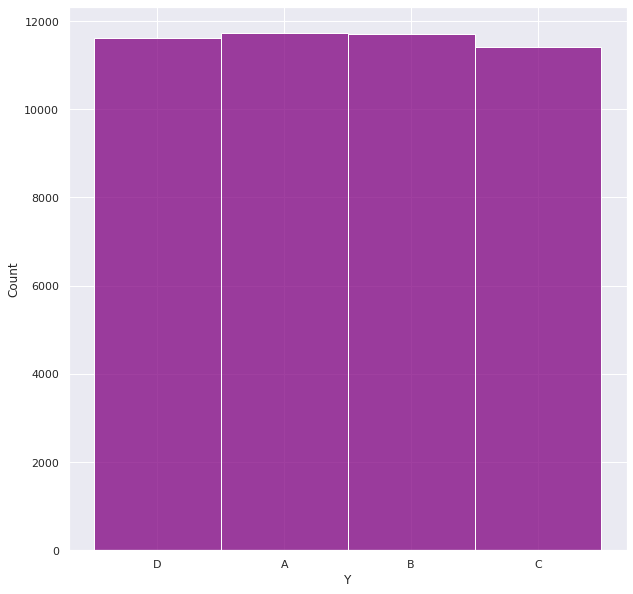

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
sns.histplot(df['Y'], color="purple")

plt.show()

In [ ]:
df.isnull().sum() * 100 / len(df)

iso_code                                    0.000000
country                                     0.000000
date                                        0.000000
jhu_confirmed                               5.962701
owid_new_deaths                             1.374519
                                             ...    
google_mobility_change_transit_stations    34.350061
google_mobility_change_workplaces          32.949730
sdsn_new_deaths_per_million_smoothed        3.456732
sdsn_overall_transmission                  50.665749
Y                                           0.000000
Length: 66, dtype: float64

# Imputation

# try different methods see how they would perform

In [ ]:
# change ISO from text categorical to numeric index
# change iso code from categorical to numeric index
df['iso_code'] = pd.factorize(df['iso_code'])[0]
df

,iso_code,country,date,jhu_confirmed,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,owid_new_deaths_per_million,owid_total_tests_per_thousand,...,yougov_improving_personal_hygiene,yougov_refraining_from_touching_objects,yougov_avoiding_contact_with_tourists,google_mobility_change_grocery_and_pharmacy,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_workplaces,sdsn_new_deaths_per_million_smoothed,sdsn_overall_transmission,Y
72,0,Aruba,2020-03-13,NaN,0.0,18.733,18.733,NaN,0.000,NaN,...,NaN,NaN,NaN,40.0,-4.0,-5.0,3.0,NaN,NaN,D
78,0,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.0,-41.0,-40.0,-40.0,NaN,NaN,D
79,0,Aruba,2020-03-20,NaN,0.0,37.465,18.733,NaN,0.000,NaN,...,NaN,NaN,NaN,-7.0,-41.0,-45.0,-41.0,NaN,NaN,D
80,0,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-19.0,-52.0,-54.0,-40.0,NaN,NaN,D
81,0,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-36.0,-52.0,-62.0,-46.0,NaN,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,183,Zimbabwe,2020-10-26,8303.0,1.0,556.822,0.471,15.946,0.067,9.221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033571,1.0,A
64671,183,Zimbabwe,2020-10-27,8315.0,5.0,558.638,1.817,16.282,0.336,9.292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0,A
64672,183,Zimbabwe,2020-10-28,8320.0,0.0,559.446,0.807,16.282,0.000,9.330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0,A
64673,183,Zimbabwe,2020-10-29,8349.0,0.0,559.782,0.336,16.282,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052786,1.0,A


In [ ]:
# then, drop non-numerics
drop_cols = [gdp_col]
# drop_cols = []

# don't have to drop iso_code anymore, i made it a numerical category
drop_cols.extend(['date','country','owid_tests_units'])

df.drop(drop_cols, axis=1, inplace=True)

In [ ]:
df.isna().sum().sum()

1017530

In [ ]:
df

,iso_code,jhu_confirmed,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,owid_new_deaths_per_million,owid_total_tests_per_thousand,owid_tests_per_case,owid_positive_rate,...,yougov_improving_personal_hygiene,yougov_refraining_from_touching_objects,yougov_avoiding_contact_with_tourists,google_mobility_change_grocery_and_pharmacy,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_workplaces,sdsn_new_deaths_per_million_smoothed,sdsn_overall_transmission,Y
72,0,NaN,0.0,18.733,18.733,NaN,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,40.0,-4.0,-5.0,3.0,NaN,NaN,D
78,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.0,-41.0,-40.0,-40.0,NaN,NaN,D
79,0,NaN,0.0,37.465,18.733,NaN,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,-7.0,-41.0,-45.0,-41.0,NaN,NaN,D
80,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-19.0,-52.0,-54.0,-40.0,NaN,NaN,D
81,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-36.0,-52.0,-62.0,-46.0,NaN,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,183,8303.0,1.0,556.822,0.471,15.946,0.067,9.221,43.411,0.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033571,1.0,A
64671,183,8315.0,5.0,558.638,1.817,16.282,0.336,9.292,40.688,0.025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0,A
64672,183,8320.0,0.0,559.446,0.807,16.282,0.000,9.330,43.969,0.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0,A
64673,183,8349.0,0.0,559.782,0.336,16.282,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052786,1.0,A


In [ ]:
# imputation
imputer = IterativeImputer()

# define imputer
# imputer = KNNImputer(n_neighbors=15, weights='distance', metric='nan_euclidean')

In [ ]:
# first, remove the class column
X = df.loc[:, df.columns != 'Y']

# fit to the entire set
imputer.fit(X)

IterativeImputer()

In [ ]:
# transform the dataset
Xtrans = imputer.transform(X)

In [ ]:
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 0


In [ ]:
# # scale the data, this is only needed for knn
# #
# trans = StandardScaler()
# Xtrans = trans.fit_transform(Xtrans)
# ##
# # ONLY NEEDED FOR KNN ^

In [ ]:
# now, instead of scaling, we will normalize the data


In [ ]:
df2 = pd.DataFrame(Xtrans)
df2.isna().sum().sum()

0

In [ ]:
df2

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0,-65165.826783,0.000000,18.733000,18.733000,24.584711,0.000000,54.869874,322.122063,0.035351,...,11.806410,73.939040,55.618033,46.074882,40.000000,-4.000000,-5.000000,3.000000,0.177088,2.451153
1,0.0,24330.336612,29.485617,1172.237771,30.690270,22.813496,0.631571,23.957663,268.463536,0.104944,...,11.978505,73.841411,55.811955,46.185217,-5.000000,-41.000000,-40.000000,-40.000000,0.553561,2.019084
2,0.0,-55008.733002,0.000000,37.465000,18.733000,3.235588,0.000000,16.431406,291.800370,0.099274,...,11.968074,73.850662,55.827968,46.142533,-7.000000,-41.000000,-45.000000,-41.000000,0.337983,1.890169
3,0.0,-8829.561470,20.321752,1789.295225,28.644093,33.271481,0.607054,7.763467,166.110045,0.108599,...,12.015081,73.855785,55.851866,46.136829,-19.000000,-52.000000,-54.000000,-40.000000,0.628009,1.878243
4,0.0,-29669.831225,13.922657,1439.466960,27.925250,39.057538,0.603010,13.970224,164.888593,0.112584,...,11.997491,73.843554,55.865285,46.161551,-36.000000,-52.000000,-62.000000,-46.000000,0.588449,1.835800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46484,183.0,8303.000000,1.000000,556.822000,0.471000,15.946000,0.067000,9.221000,43.411000,0.023000,...,11.928787,73.515114,55.756418,46.880718,-12.888025,-9.309675,-27.787969,-24.209483,0.033571,1.000000
46485,183.0,8315.000000,5.000000,558.638000,1.817000,16.282000,0.336000,9.292000,40.688000,0.025000,...,11.922451,73.512141,55.753034,46.871585,-12.896245,-9.409061,-27.802214,-24.222399,0.057571,1.000000
46486,183.0,8320.000000,0.000000,559.446000,0.807000,16.282000,0.000000,9.330000,43.969000,0.023000,...,11.928962,73.518741,55.755494,46.874917,-12.882145,-9.352221,-27.790772,-24.212374,0.057571,1.000000
46487,183.0,8349.000000,0.000000,559.782000,0.336000,16.282000,0.000000,-78.860397,270.749627,0.082252,...,11.889783,73.600334,55.757837,46.963764,-13.260754,-8.388710,-27.844451,-24.251014,0.052786,1.000000


In [ ]:
# read my pickled object?

In [ ]:
X_combined = df2.copy()
X_combined = X_combined.rename(columns={0:"iso_code"}) 
X_combined.isna().sum().sum()

0

In [ ]:
# must assign values, otherwise get all NaN
X_combined['Y'] = df['Y'].values
X_combined[:-1].isna().sum().sum()

0

In [ ]:
X_combined

,iso_code,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Y
0,-1.709695,-0.175983,-0.194166,-0.477296,-0.149873,-0.443378,-0.225370,-0.369755,0.096217,-0.621639,...,-0.265985,-0.289824,-0.855010,2.548833,-0.065938,1.090295,1.319909,-0.352622,-0.965311,D
1,-1.709695,-0.175751,-0.192650,7.530116,0.617068,1.656565,0.457466,-0.280261,-0.027208,-0.549248,...,0.474235,1.210680,3.081535,0.239475,-0.830319,-0.362805,-0.877872,1.328032,2.152911,D
2,-1.709695,-0.175887,-0.194166,-0.473680,-0.149873,-0.442550,-0.225370,-0.364801,0.045994,-0.553366,...,-0.161562,-0.122759,-0.299854,0.136837,-0.830319,-0.570391,-0.928983,-0.343687,-0.965311,D
3,-1.709695,-0.175676,-0.192650,7.530116,0.617068,1.656565,0.457466,-0.143224,-0.118104,-0.550469,...,0.700789,1.479914,3.095357,-0.478991,-1.057567,-0.944045,-0.877872,1.328032,2.152911,D
4,-1.709695,-0.175773,-0.192650,7.530116,0.617068,1.656565,0.457466,-0.207732,-0.019689,-0.672250,...,0.868583,1.639517,3.095687,-1.351415,-1.057567,-1.276182,-1.184539,1.328032,2.152911,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46484,1.759249,-0.157743,-0.186584,-0.373416,-0.363496,-0.345939,-0.200946,-0.279228,-0.170590,-0.521003,...,0.603198,1.010570,1.048938,-0.030111,-0.167214,0.452822,0.160806,-0.332542,-0.965311,A
46485,1.759249,-0.157717,-0.156254,-0.373066,-0.347751,-0.343856,-0.102888,-0.278527,-0.173471,-0.491535,...,1.156370,1.176197,1.474728,1.232914,0.443239,1.143645,1.218047,-0.318187,-0.965311,A
46486,1.759249,-0.157706,-0.194166,-0.372910,-0.359566,-0.343856,-0.225370,-0.278152,-0.169999,-0.521003,...,1.097863,1.170657,1.475722,1.161226,0.398399,1.090349,1.143764,-0.318187,-0.965311,A
46487,1.759249,-0.157642,-0.194166,-0.372845,-0.365075,-0.343856,-0.225370,-0.286919,-0.182991,-0.145509,...,1.013328,1.138954,1.603118,1.032079,0.323687,1.008130,1.022249,-0.321050,-0.965311,A


In [ ]:
X_combined.isna().sum().sum()

0

In [ ]:
# ok so thats done now.. now i have my imputed dataframe

# X_combined.to_pickle('/content/drive/MyDrive/pickle_knn_imputed_df_scaled_1.csv') 

# X_combined = pd.read_pickle('/content/drive/MyDrive/pickle_knn_imputed_df.csv')
X_combined = pd.read_pickle('/content/drive/MyDrive/pickle_knn_imputed_df_scaled.csv')


# X_combined = pd.read_pickle('/content/drive/MyDrive/pickle_scaled.csv')



In [ ]:
X_combined

,iso_code,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Y
0,-1.709695,-0.175983,-0.194166,-0.477296,-0.149873,-0.443378,-0.225370,-0.369755,0.096217,-0.621639,...,-0.265985,-0.289824,-0.855010,2.548833,-0.065938,1.090295,1.319909,-0.352622,-0.965311,D
1,-1.709695,-0.175751,-0.192650,7.530116,0.617068,1.656565,0.457466,-0.280261,-0.027208,-0.549248,...,0.474235,1.210680,3.081535,0.239475,-0.830319,-0.362805,-0.877872,1.328032,2.152911,D
2,-1.709695,-0.175887,-0.194166,-0.473680,-0.149873,-0.442550,-0.225370,-0.364801,0.045994,-0.553366,...,-0.161562,-0.122759,-0.299854,0.136837,-0.830319,-0.570391,-0.928983,-0.343687,-0.965311,D
3,-1.709695,-0.175676,-0.192650,7.530116,0.617068,1.656565,0.457466,-0.143224,-0.118104,-0.550469,...,0.700789,1.479914,3.095357,-0.478991,-1.057567,-0.944045,-0.877872,1.328032,2.152911,D
4,-1.709695,-0.175773,-0.192650,7.530116,0.617068,1.656565,0.457466,-0.207732,-0.019689,-0.672250,...,0.868583,1.639517,3.095687,-1.351415,-1.057567,-1.276182,-1.184539,1.328032,2.152911,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46484,1.759249,-0.157743,-0.186584,-0.373416,-0.363496,-0.345939,-0.200946,-0.279228,-0.170590,-0.521003,...,0.603198,1.010570,1.048938,-0.030111,-0.167214,0.452822,0.160806,-0.332542,-0.965311,A
46485,1.759249,-0.157717,-0.156254,-0.373066,-0.347751,-0.343856,-0.102888,-0.278527,-0.173471,-0.491535,...,1.156370,1.176197,1.474728,1.232914,0.443239,1.143645,1.218047,-0.318187,-0.965311,A
46486,1.759249,-0.157706,-0.194166,-0.372910,-0.359566,-0.343856,-0.225370,-0.278152,-0.169999,-0.521003,...,1.097863,1.170657,1.475722,1.161226,0.398399,1.090349,1.143764,-0.318187,-0.965311,A
46487,1.759249,-0.157642,-0.194166,-0.372845,-0.365075,-0.343856,-0.225370,-0.286919,-0.182991,-0.145509,...,1.013328,1.138954,1.603118,1.032079,0.323687,1.008130,1.022249,-0.321050,-0.965311,A


In [ ]:
#now, normalize the data
X = X_combined.loc[:, X_combined.columns != 'Y']
transformer = Normalizer().fit(X)


In [ ]:
transformer.transform(X)

array([[-0.18567636, -0.01911206, -0.02108686, ...,  0.14334481,
        -0.03829549, -0.1048347 ],
       [-0.15835908, -0.01627876, -0.01784403, ..., -0.08131216,
         0.12300781,  0.19941154],
       [-0.3073239 , -0.03161632, -0.03490211, ..., -0.16698811,
        -0.06177897, -0.17351809],
       ...,
       [ 0.28400885, -0.02545967, -0.03134575, ...,  0.18464641,
        -0.05136739, -0.15583741],
       [ 0.29043408, -0.02602513, -0.03205489, ...,  0.16876284,
        -0.05300205, -0.15936297],
       [ 0.33750806,  0.00979225, -0.0372504 , ..., -0.19521974,
        -0.0615927 , -0.18519275]])

Now, that we have our imputed dataframe, try k-means classifier


In [ ]:
# define groups
groups = X_combined['iso_code'].values
n_splits = 10

In [ ]:
X = X_combined.loc[:, X_combined.columns != 'Y']
Y = X_combined['Y']

Y.shape, X.shape

((46489,), (46489, 60))

In [ ]:
X_combined.columns

Index(['iso_code',          1,          2,          3,          4,          5,
                6,          7,          8,          9,         10,         11,
               12,         13,         14,         15,         16,         17,
               18,         19,         20,         21,         22,         23,
               24,         25,         26,         27,         28,         29,
               30,         31,         32,         33,         34,         35,
               36,         37,         38,         39,         40,         41,
               42,         43,         44,         45,         46,         47,
               48,         49,         50,         51,         52,         53,
               54,         55,         56,         57,         58,         59,
              'Y'],
      dtype='object')

In [ ]:
# now that i made iso_code numeric, drop all non-numerics

Now that I assigned a new class variable, i can drop the previous numeric column (which could be used for regression, i suppose)

# USE GROUPKFOLD

using groups as cross validation as not to overfit

In [ ]:
groups

array([-1.70969548, -1.70969548, -1.70969548, ...,  1.75924917,
        1.75924917,  1.75924917])

In [ ]:
sgkf = StratifiedGroupKFold(n_splits=10)

In [ ]:
classifier = MLPClassifier()
classifier.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
# from sklearn.neural_network import MLPClassifier
# # apparently this one can't work with NaN values either. 

In [ ]:
# hidden_layer_sizes=(100,)
# hidden_layer_sizes=(150,100,50)
# hidden_layer_sizes=(100,50,8)

In [ ]:
accuracies = []
cfs = []
clff = []

i = 0
for split, (train, test) in enumerate(sgkf.split(X, Y, groups=groups)):
  print(split)
  print(train)
  print(test)
  # if i == 1:
  #   break

  x_train_grouped = X.values[train]
  x_test_grouped = X.values[test]
  y_train_grouped = Y.values[train]
  y_test_grouped = Y.values[test]

  classifier = MLPClassifier(random_state=12, early_stopping=True, learning_rate_init=0.0001)
  classifier.fit(x_train_grouped,y_train_grouped)

  y_pred = classifier.predict(x_test_grouped)
  acc = accuracy_score(y_pred, y_test_grouped)
  accuracies.append(acc)
  # print("Accuracy of the model is: %.3f" % acc)

  report = classification_report(y_pred, y_test_grouped)
  print('report:', report, sep='\n')

  clff.append(classifier)

  conf_matrix = confusion_matrix(y_test_grouped, y_pred)
  cfs.append(conf_matrix)




  i = i+1

0
[    0     1     2 ... 46486 46487 46488]
[  991   992   993 ... 44269 44270 44271]
report:
              precision    recall  f1-score   support

           A       0.68      0.89      0.77       909
           B       0.68      0.73      0.70      1147
           C       0.98      0.67      0.79      1580
           D       0.84      0.95      0.89      1010

    accuracy                           0.79      4646
   macro avg       0.79      0.81      0.79      4646
weighted avg       0.82      0.79      0.79      4646

1
[    0     1     2 ... 46486 46487 46488]
[ 1536  1537  1538 ... 44574 44575 44576]
report:
              precision    recall  f1-score   support

           A       0.43      0.95      0.59       523
           B       0.63      0.38      0.48      2047
           C       0.39      0.41      0.40      1034
           D       0.81      0.91      0.86      1014

    accuracy                           0.57      4618
   macro avg       0.57      0.66      0.58      46

In [ ]:
classifier = clff[0]

# X_combined.columns

In [ ]:
picked = cfs[-4]
picked

array([[ 988,  201,    0,    0],
       [ 299,  720,  224,    7],
       [  30,  344,  854,   16],
       [   0,   34,  125, 1031]])

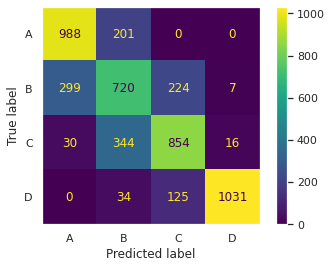

In [ ]:
disp=ConfusionMatrixDisplay(confusion_matrix=picked, display_labels=classifier.classes_)
disp.plot()
plt.grid()
plt.show()

In [ ]:

disp=ConfusionMatrixDisplay(confusion_matrix=picked, display_labels=classifier.classes_)
disp.plot()
plt.grid()
plt.show()

In [ ]:
classifier = MLPClassifier()
classifier.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

In [ ]:
Average(accuracies)

# LR 0.0001,  0.69154
# LR 0.001,

0.6771494233616414

In [ ]:
# try tuning it a little bit
# mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,),(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# for train, test in enumerate(sgkf.split(X, Y, groups=groups)):
for split, (train, test) in enumerate(sgkf.split(X, Y, groups=groups)):
  print(split)
  print(train)
  print(test)

  x_train_grouped = X.values[train]
  x_test_grouped = X.values[test]
  y_train_grouped = Y.values[train]
  y_test_grouped = Y.values[test]

  # classifier = HistGradientBoostingClassifier()
  classifier = MLPClassifier(solver='sgd')
  classifier.fit(x_train_grouped,y_train_grouped)

  y_pred = classifier.predict(x_test_grouped)
  acc = accuracy_score(y_pred, y_test_grouped)
  # print("Accuracy of the model is: %.3f" % acc)

  report = classification_report(y_pred, y_test_grouped)
  print('report:', report, sep='\n')

0
[    0     1     2 ... 46486 46487 46488]
[  991   992   993 ... 44269 44270 44271]
report:
              precision    recall  f1-score   support

           A       0.70      0.78      0.74      1068
           B       0.62      0.77      0.68       995
           C       0.99      0.66      0.79      1624
           D       0.80      0.95      0.86       959

    accuracy                           0.77      4646
   macro avg       0.78      0.79      0.77      4646
weighted avg       0.80      0.77      0.77      4646

1
[    0     1     2 ... 46486 46487 46488]
[ 1536  1537  1538 ... 44574 44575 44576]
report:
              precision    recall  f1-score   support

           A       0.59      0.92      0.72       754
           B       0.69      0.44      0.53      1936
           C       0.37      0.41      0.39       979
           D       0.76      0.92      0.83       949

    accuracy                           0.61      4618
   macro avg       0.60      0.67      0.62      46

In [ ]:
# for train, test in enumerate(sgkf.split(X, Y, groups=groups)):
for split, (train, test) in enumerate(sgkf.split(X, Y, groups=groups)):
  print(split)
  print(train)
  print(test)

  x_train_grouped = X.values[train]
  x_test_grouped = X.values[test]
  y_train_grouped = Y.values[train]
  y_test_grouped = Y.values[test]

  # classifier = HistGradientBoostingClassifier()
  classifier = MLPClassifier(hidden_layer_sizes=(200,))
  classifier.fit(x_train_grouped,y_train_grouped)

  y_pred = classifier.predict(x_test_grouped)
  acc = accuracy_score(y_pred, y_test_grouped)
  # print("Accuracy of the model is: %.3f" % acc)

  report = classification_report(y_pred, y_test_grouped)
  print('report:', report, sep='\n')

0
[    0     1     2 ... 46486 46487 46488]
[  991   992   993 ... 44269 44270 44271]
report:
              precision    recall  f1-score   support

           A       0.67      0.79      0.72      1000
           B       0.56      0.75      0.65       928
           C       0.98      0.63      0.77      1660
           D       0.86      0.93      0.89      1058

    accuracy                           0.76      4646
   macro avg       0.77      0.78      0.76      4646
weighted avg       0.80      0.76      0.76      4646

1
[    0     1     2 ... 46486 46487 46488]
[ 1536  1537  1538 ... 44574 44575 44576]
report:
              precision    recall  f1-score   support

           A       0.30      0.94      0.45       371
           B       0.59      0.34      0.43      2162
           C       0.36      0.36      0.36      1076
           D       0.82      0.93      0.87      1009

    accuracy                           0.52      4618
   macro avg       0.52      0.64      0.53      46

In [ ]:
# for train, test in enumerate(sgkf.split(X, Y, groups=groups)):
for split, (train, test) in enumerate(sgkf.split(X, Y, groups=groups)):
  print(split)
  print(train)
  print(test)

  x_train_grouped = X.values[train]
  x_test_grouped = X.values[test]
  y_train_grouped = Y.values[train]
  y_test_grouped = Y.values[test]

  # classifier = HistGradientBoostingClassifier()
  classifier = MLPClassifier(solver='lbfgs')
  classifier.fit(x_train_grouped,y_train_grouped)

  y_pred = classifier.predict(x_test_grouped)
  acc = accuracy_score(y_pred, y_test_grouped)
  # print("Accuracy of the model is: %.3f" % acc)

  report = classification_report(y_pred, y_test_grouped)
  print('report:', report, sep='\n')

0
[    0     1     2 ... 46486 46487 46488]
[  991   992   993 ... 44269 44270 44271]
report:
              precision    recall  f1-score   support

           A       0.56      0.74      0.64       910
           B       0.54      0.63      0.58      1061
           C       1.00      0.66      0.79      1630
           D       0.82      0.89      0.85      1045

    accuracy                           0.72      4646
   macro avg       0.73      0.73      0.72      4646
weighted avg       0.77      0.72      0.73      4646

1
[    0     1     2 ... 46486 46487 46488]
[ 1536  1537  1538 ... 44574 44575 44576]
report:
              precision    recall  f1-score   support

           A       0.34      0.89      0.50       448
           B       0.75      0.45      0.56      2080
           C       0.50      0.44      0.47      1240
           D       0.71      0.95      0.81       850

    accuracy                           0.58      4618
   macro avg       0.58      0.68      0.58      46

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array(['C', 'D', 'D', ..., 'D', 'B', 'B'], dtype=object)

In [ ]:
print("Accuracy of the model is: %.3f" % accuracy_score(y_pred, Y_test))

Accuracy of the model is: 0.568


In [ ]:
## Confusion Matrix for the predicted outputs
conf_matrix = confusion_matrix(Y_test, y_pred)
conf_matrix

array([[2832,    0,    0,  242],
       [ 898,  846,  238,  248],
       [   0,  476,  404,  979],
       [   0,  413,  587, 1281]])

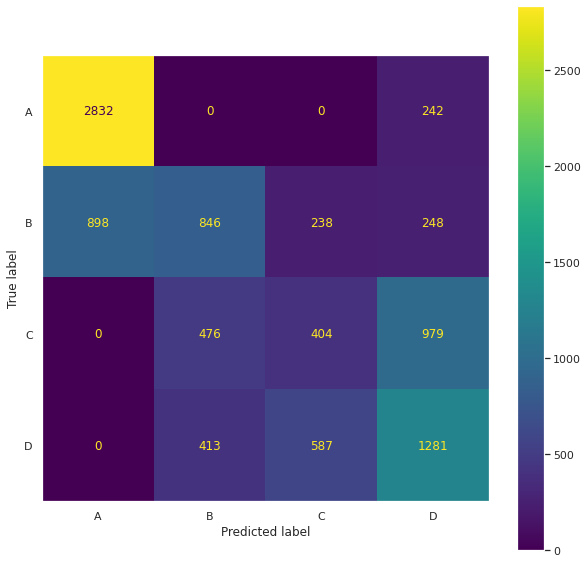

In [ ]:
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classifier.classes_)
disp.plot()
plt.grid()
plt.show()

In [ ]:
confusion_matrix(Y_test, y_pred, normalize="true").diagonal()

array([0.92127521, 0.3793722 , 0.21732114, 0.56159579])

In [ ]:
report = classification_report(Y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           A       0.76      0.92      0.83      3074
           B       0.49      0.38      0.43      2230
           C       0.33      0.22      0.26      1859
           D       0.47      0.56      0.51      2281

    accuracy                           0.57      9444
   macro avg       0.51      0.52      0.51      9444
weighted avg       0.54      0.57      0.55      9444



# Review

Its terrible at predicting the middle classes, decently good at predicting the highest and the lowest GDP brackets (classes)